### 스크레이핑, 크롤링
- Scraping: 웹 사이트의 특정 정보를 추출하는 것. 웹 데이터의 구조 분석이 필요
- 로그인이 필요한 경우가 많다
- Crawling: 프로그램이 웹사이트를 정기적으로 돌며 정보를 추출하는 것 (이러한 프로그램을 크롤러, 스파이더라고 한다)

#### urllib 사용법
- url 관련 데이터를 처리하는 라이브러리
- http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용

#### 웹에서 파일 다운로드하기

In [1]:
# 네이버 실시간 검색어
import re
import requests

re.findall('<span class="ah_k">(.*?)</span>', requests.get('http://naver.com').text)[:20]

['문근영',
 '로또846회당첨번호',
 '정우성 나이',
 '스테파니 미초바',
 '어퓨굿맨',
 '빈지노',
 '하키 꿈꾸는 소년',
 '유병재',
 '1987',
 '한국의 레이디가가',
 '하키',
 '미초바',
 '잼라이브 힌트',
 '영화 1987',
 '선을 넘는 녀석들',
 '양귀비',
 '꿈꾸는 소년',
 '이한열 열사',
 '원피스 873화 애니',
 '인기가요']

In [2]:
# json으로 보기
import json, requests
from pandas.io.json import json_normalize

r = requests.get('http://rank.search.naver.com/rank.js')
json_normalize(json.loads(r.text), ['data', 'data'])

,change,cvalue,delta,keyword,rank,ratio,score,tvalue
0,+,0.0,0,문근영,1,.,0,0.0
1,+,0.0,0,로또846회당첨번호,2,.,0,0.0
2,+,0.0,0,정우성 나이,3,.,0,0.0
3,+,0.0,0,스테파니 미초바,4,.,0,0.0
4,+,0.0,0,빈지노,5,.,0,0.0
5,+,0.0,0,어퓨굿맨,6,.,0,0.0
6,+,0.0,0,유병재,7,.,0,0.0
7,+,0.0,0,1987,8,.,0,0.0
8,+,0.0,0,한국의 레이디가가,9,.,0,0.0
9,+,0.0,0,하키 꿈꾸는 소년,10,.,0,0.0


In [46]:
import urllib.request
url = "http://uta.pw/shodou/img/28/214.png"
savename = "data/test.png"
urllib.request.urlretrieve(url, savename)

('data/test.png', <http.client.HTTPMessage at 0x7f456c6d00f0>)

#### urlopen() 사용법
- 위의 urlretrive()는 데이터를 파일에 바로 저장하였다.
- urlopen()을 사용하면 데이터를 파이선에서 읽을 수 있다.

In [47]:
mem = urllib.request.urlopen(url).read()
with open(savename, "wb") as f:
    f.write(mem)

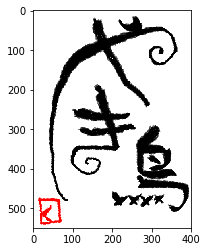

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(savename))

#### 웹 API 이용하기
- 클라이언트정보를 보여주는 샘플 api 사이트 접속

In [21]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlopen(url)
data = res.read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)
print(data)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=210.115.49.252
REMOTE_HOST=210.115.49.252
REMOTE_PORT=58544
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.6
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=210.115.49.252\nREMOTE_HOST=210.115.49.252\nREMOTE_PORT=58544\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.6\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'


In [44]:
# 파라미터를 전송하여 데이터를 읽는 예
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"


# 파라미터 코딩, 딕셔너리 사용, 109: 서울 경기지역
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = urllib.request.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2018년 03월 06일 (화)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2018년 03월 06일 (화)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201803061800</tm>
		<wf><![CDATA[저기압의 영향으로 9일 강원영동과 경상도, 제주도에 비 또는 눈이 오겠고, 제주도는 15일에도 비가 오겠습니다. <br />그 밖의 날은 고기압의 영향으로 대체로 맑은 날이 많겠습니다.<br />기온은 평년(최저기온: -4~5도, 최고기온: 8~14도)과 비슷하거나 조금 낮겠으나, 후반에는 조금 높겠습니다.<br />강수량은 평년(1~5mm)보다 적겠으나, 강원영동과 경상도, 제주도는 많겠습니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<provin

####  GET  요청을 사용하여 파라미터를 보내는 경우
- URL 끝 부분에 ?를 입력하고 key = value 형식으로 매개변수를 추가한다. 여러개의 파라미터를 넣는 경우 &를 사용하여 구분한다
- 한글 등이 파라미터로 사용될 때는 반드시 이러한 코딩을 해주어야 한다

#### 키보드에서 파라미터를 입력받는 방법

In [49]:
import sys
import urllib.parse as parse
import urllib.request as req

# 명령어를 사용하는 경우 사용법 python3 forecast.py 108
# if len(sys.argv) <= 1:
#     print("python3 forecast.py 지역번호")
#     sys.exit()  
# regionNumber = sys.argv[1]

regionNumber = input()

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

values = {
    'stdId': regionNumber
}

params = parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = req.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


108
url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=108
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2018년 03월 09일 (금)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2018년 03월 09일 (금)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201803091800</tm>
		<wf><![CDATA[기압골의 영향으로 15일과 16일 전국에 비(강원영동 비 또는 눈)가 오겠습니다. <br />그 밖의 날은 고기압의 영향으로 대체로 맑은 날이 많겠습니다.<br />기온은 평년(최저기온: -3~6도, 최고기온: 9~15도)과 비슷하거나 조금 높겠습니다.<br />강수량은 평년(1~5mm)보다 많겠습니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<province>서울ㆍ인천ㆍ경기도</province>
				<city>서울</city>
				
